<a href="https://colab.research.google.com/github/lcroffi/CNN/blob/master/CNN_InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
img_width, img_height = 299, 299

In [3]:
# importa o modelo InceptionResNetV2 e descarta a última camada do classifier.
base_model=InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

W0719 18:54:03.482046 140624009312128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 18:54:03.525911 140624009312128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 18:54:03.535020 140624009312128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 18:54:03.564234 140624009312128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0719 18:54:03.565102 1406240093

219062272/219055592 [==============================] - 8s 0us/step


In [4]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed_5b
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 conv2d_13
51 conv2d_15
52 conv2d_18
53 batch_normalization_13
54 batch_normalization_15
55 batch_normalization

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

W0719 19:01:22.552197 140624009312128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Baixar as imagens do exame de citologia cervical
!wget -cq https://citologia-cervical.s3-sa-east-1.amazonaws.com/citologia.zip
!unzip -qq citologia.zip

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [12]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory('valid',
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=True)

Found 423 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [18]:
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 105/32)

Epoch 1/20
17/16 [==============================] - 15s 909ms/step - loss: 3.2351 - acc: 0.3693 - val_loss: 1.2612 - val_acc: 0.4095
Epoch 2/20
17/16 [==============================] - 6s 380ms/step - loss: 1.4583 - acc: 0.3983 - val_loss: 1.2626 - val_acc: 0.4952
Epoch 3/20
17/16 [==============================] - 6s 381ms/step - loss: 1.1476 - acc: 0.4556 - val_loss: 0.9860 - val_acc: 0.5429
Epoch 4/20
17/16 [==============================] - 7s 383ms/step - loss: 1.0098 - acc: 0.5102 - val_loss: 2.2511 - val_acc: 0.3905
Epoch 5/20
17/16 [==============================] - 6s 371ms/step - loss: 1.0298 - acc: 0.5074 - val_loss: 1.5250 - val_acc: 0.4952
Epoch 6/20
17/16 [==============================] - 7s 386ms/step - loss: 1.0103 - acc: 0.5156 - val_loss: 1.5859 - val_acc: 0.4286
Epoch 7/20
17/16 [==============================] - 7s 386ms/step - loss: 0.9919 - acc: 0.5218 - val_loss: 1.0573 - val_acc: 0.5524
Epoch 8/20
17/16 [==============================] - 7s 389ms/step - loss: 0

In [0]:
for layer in model.layers[:516]:
   layer.trainable = False
for layer in model.layers[516:]:
   layer.trainable = True

In [0]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from google.colab import drive
from keras.callbacks import *

drive.mount('/content/drive')
filepath="/content/drive/My Drive/Colab Notebooks/log/inceptionresnetv2:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [22]:
# Fine-tune
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 105/32,
                    callbacks=callbacks_list)

Epoch 1/100
17/16 [==============================] - 27s 2s/step - loss: 0.6484 - acc: 0.6865 - val_loss: 1.0485 - val_acc: 0.5238

Epoch 00001: val_acc improved from -inf to 0.52381, saving model to /content/drive/My Drive/Colab Notebooks/log/inceptionresnetv2:001-val_acc:0.524.hdf5
Epoch 2/100
17/16 [==============================] - 10s 579ms/step - loss: 0.6358 - acc: 0.7086 - val_loss: 1.0085 - val_acc: 0.5524

Epoch 00002: val_acc improved from 0.52381 to 0.55238, saving model to /content/drive/My Drive/Colab Notebooks/log/inceptionresnetv2:002-val_acc:0.552.hdf5
Epoch 3/100
17/16 [==============================] - 10s 585ms/step - loss: 0.6473 - acc: 0.7093 - val_loss: 1.1011 - val_acc: 0.4476

Epoch 00003: val_acc did not improve from 0.55238
Epoch 4/100
17/16 [==============================] - 10s 564ms/step - loss: 0.6597 - acc: 0.7163 - val_loss: 1.0337 - val_acc: 0.5238

Epoch 00004: val_acc did not improve from 0.55238
Epoch 5/100
17/16 [==============================] - 1

In [0]:
# Carregando o modelo com o peso melhor treinado (exemplo: carregando epoch 47, validation accuracy de 90.5%)

model.load_weights('/content/drive/My Drive/Colab Notebooks/log/inceptionresnetv2:059-val_acc:0.600.hdf5')

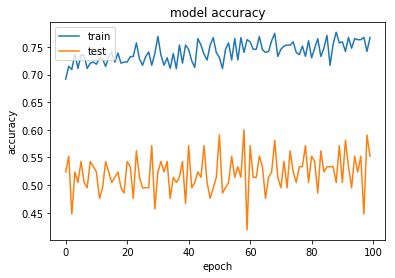

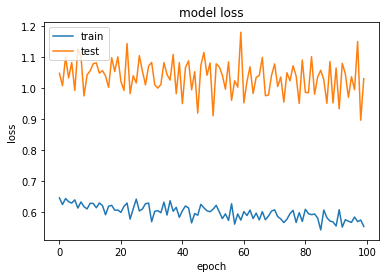

In [24]:
import matplotlib.pyplot as plt

# Gráfico de treino - acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# métricas de perda e acurácia
score = model.evaluate_generator(validation_set, 105)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 103.40%
acc: 52.43%


In [26]:
!pip install --upgrade --quiet PyDrive
# para conectar com o Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 9.9MB/s 


In [0]:
# Salvando o modelo no drive

model.save("model_inceptionresnetv2.h5")
uploaded = drive.CreateFile({'title': 'model_inceptionresnetv2.h5'})
uploaded.SetContentFile('model_inceptionresnetv2.h5')
uploaded.Upload()

In [0]:
# Importando imagens de teste do drive

link = 'https://drive.google.com/open?id=1sbjcK__NABa7gfsPOt7JM8jAaXCLCfKW'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste1_cytHigh-grade Squamous Intraepithelial Lesion - 14659.jpg')

link = 'https://drive.google.com/open?id=1vDBjgozlaLg0tcGQ50b9wpOBz_NYyx8o'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste2_cyt14721.jpg')

link = 'https://drive.google.com/open?id=14mCco19UM0k83Irdz3xk2lQaOs7a1YuK'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste3_cytoCandida - 7557.jpg')

In [33]:
# Testando o modelo
from keras.preprocessing import image

test_image = image.load_img('teste3_cytoCandida - 7557.jpg', target_size = (299, 299))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 0:
    diagnostico = 'Carcinoma'
elif result[0][0] == 1:
    diagnostico = 'Normal'
else:
    diagnostico = 'Outros problemas'
    
print ('Diagnóstico:', diagnostico)

Diagnóstico: Normal
